# The Office Text Analyzer
### Which Office Character do you sound most like?
* We will read in the entire Office scripts
* Analyze the words the different characters use
* The Analyzer will match the given text to an Office character
---



## Part 1 
### Dive into Dataset 

In [6]:
# import and read the data
import seaborn as sns
import pandas as pd 
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

the_office_raw_script = pd.read_excel("the-office-lines.xlsx")
the_office_raw_script['speaker'] = the_office_raw_script['speaker'].str.lower()
the_office_raw_script['speaker']  = the_office_raw_script['speaker'].replace(['micheal', 'michel', 'michal', 'Michael [on phone]'], 'michael')

# Generate text files for the six main characters

from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

characters = ['andy', 'michael', 'dwight', 'jim', 'pam']
remove_common = { 'all', 'Oh', 'Oh,', 'That', 'That\'s', 'Okay', 'just', 'right', 'It ', 'It\'s', 'it', 'it\'s', 'like', 'being', 'over', 'both', 'told', 'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to', 'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they', 'not', 'during', 'now', 'him', 'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are', 'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 't', 'be', 'we', 'who', 'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 's', 'or', 'own', 'into', 'yourself', 'down', 'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was', 'until', 'more', 'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will', 'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at', 'have', 'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most', 'such', 'why', 'a', 'off', 'i', 'yours', 'so', 'the', 'having', 'once', 'Yeah', 'yeah', 'know', 'well', "Well", "guy" }

for x in characters:
    liesttemp = []
    officelines_sub = the_office_raw_script[the_office_raw_script['speaker']== x]
    temp = officelines_sub[['line_text']]
    temp = temp.line_text.str.cat(sep = ' ')
    temp = temp.split()
    resultwords  = [word for word in temp if word.lower() not in remove_common]
    with open("lines_by_" + x + ".txt", 'w', encoding="utf-8") as f:
        for item in resultwords:
            f.write("%s\n" % item)

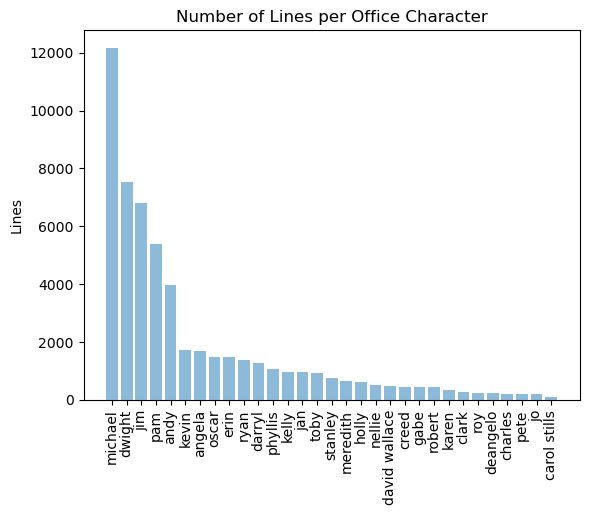

In [7]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

officelines_total = the_office_raw_script.groupby( [ "speaker"] ).size().to_frame(name = 'lines').reset_index().sort_values('lines', ascending = False)
characters_with_at_least_100_lines = officelines_total[officelines_total['lines'] >= 100]

characters = characters_with_at_least_100_lines['speaker']
y_pos = np.arange(len(characters))
performance = characters_with_at_least_100_lines['lines']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, characters, rotation = 90)
plt.ylabel('Lines')
plt.title('Number of Lines per Office Character')

plt.show()



Text(0.5, 1.0, 'Dwight')

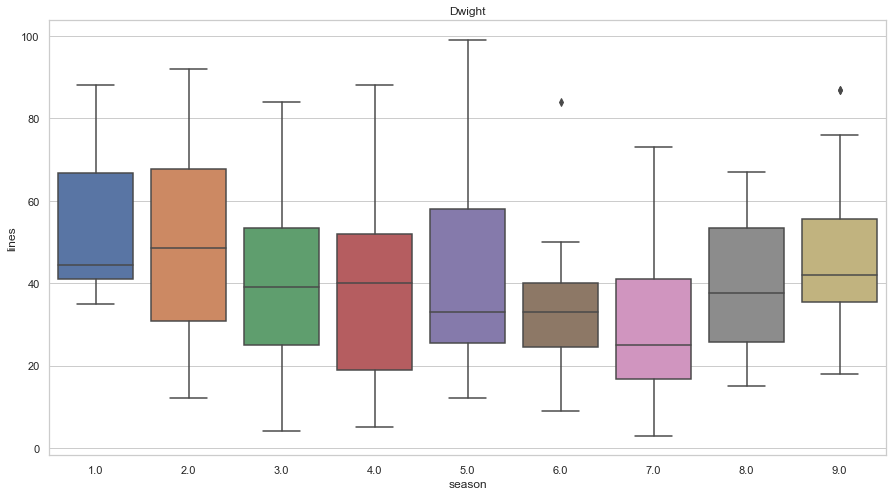

In [17]:
officelines = the_office_raw_script.groupby( [ "speaker", "season", "episode", "Episode Name"] ).size().to_frame(name = 'lines').reset_index()
characters = ['andy', 'michael', 'dwight', 'jim', 'pam']

tempdmf = officelines[officelines['speaker'] == 'dwight']
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
sns.boxplot(x="season", y = "lines", data = tempdmf)
plt.title('Dwight')

Text(0.5, 1.0, 'Jim, Season 4')

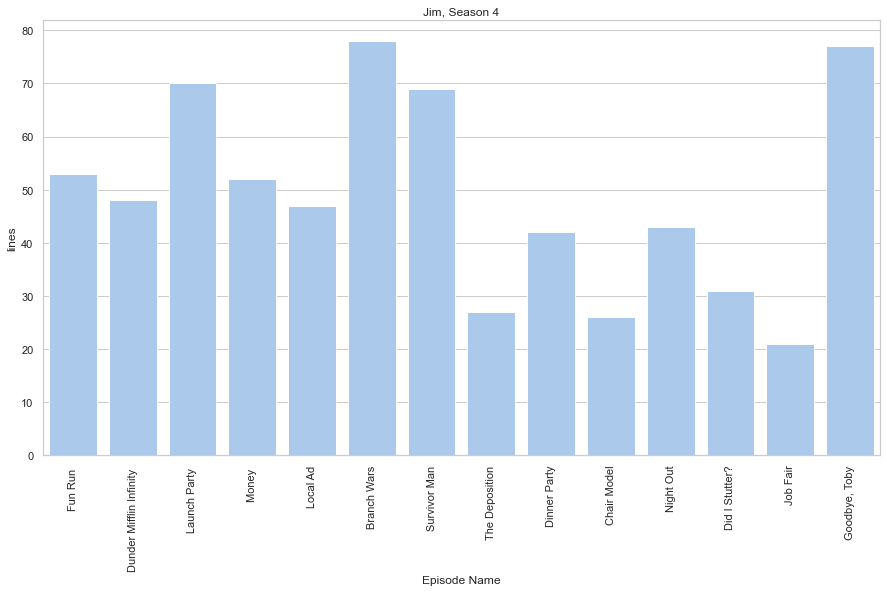

In [19]:
tempdmf = officelines[(officelines['speaker'] == 'jim') & (officelines['season'] == 4)]
sns.set_color_codes("pastel")
plt.figure(figsize=(15, 8))
g = sns.barplot(x="Episode Name", y="lines", data=tempdmf,
            label="Total", color="b" )
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Jim, Season 4')

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
remove_common = { 'all', 'Oh', 'Oh,', 'That', 'That\'s', 'Okay', 'just', 'right', 'It ', 'It\'s', 'it', 'it\'s', 'like', 'being', 'over', 'both', 'told', 'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to', 'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they', 'not', 'during', 'now', 'him', 'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are', 'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 't', 'be', 'we', 'who', 'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 's', 'or', 'own', 'into', 'yourself', 'down', 'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was', 'until', 'more', 'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will', 'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at', 'have', 'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most', 'such', 'why', 'a', 'off', 'i', 'yours', 'so', 'the', 'having', 'once', 'Yeah', 'yeah', 'know', 'well', "Well", "guy" }

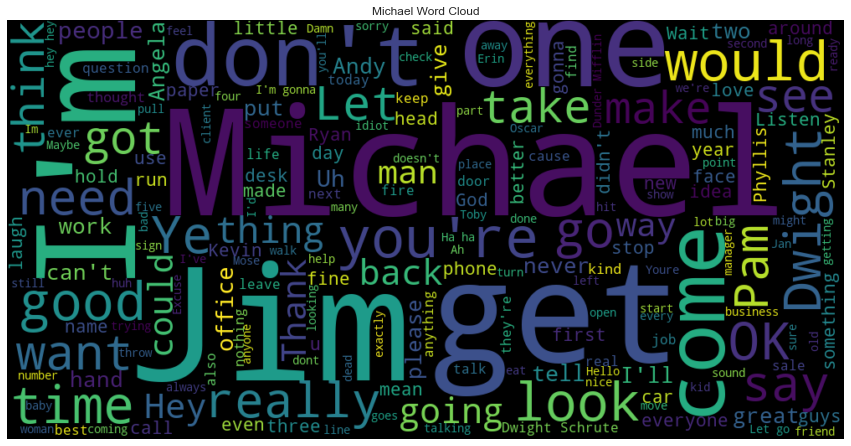

In [25]:
text = open("lines_by_dwight.txt").read()

wc = WordCloud(stopwords=remove_common, height=500, width=1000)
wc.generate(text)
    # Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Michael Word Cloud')
plt.show()

## Part 2 
### Creating a Text Analyzer: Predicting Office Character Text 
---
I created a model that will analyze every line said by the main characters on The Office. The model will consider a string, and then make a guess which character that string 'sounds like'. 





In [30]:
# Characters of Interest
the_office_class = the_office_raw_script[ (the_office_raw_script['speaker'] == 'jim') |
                             (the_office_raw_script['speaker'] == 'michael') |
                           (the_office_raw_script['speaker'] == 'pam') |
                            (the_office_raw_script['speaker'] == 'andy') |
                            (the_office_raw_script['speaker'] == 'dwight')]

the_office_class['num_speaker'] = the_office_class.speaker.map({'jim':1, 'michael':2, 'pam':3, 'andy':4, 'dwight':5})


# Resample to make everyone have the same amount of lines
the_office_class_pam = the_office_class[the_office_class['speaker'] == "pam"]
the_office_class_pam_resample = resample(the_office_class_pam, 
                                         replace=True,     # sample with replacement
                                         n_samples=12137,    # to match majority class
                                         random_state=123) # reproducible results
 
    
the_office_class_jim = the_office_class[the_office_class['speaker'] == "jim"]
the_office_class_jim_resample = resample(the_office_class_jim, 
                                         replace=True,     # sample with replacement
                                         n_samples=12137,    # to match majority class
                                         random_state=123) # reproducible results

the_office_class_dwight = the_office_class[the_office_class['speaker'] == "dwight"]
the_office_class_dwight_resample = resample(the_office_class_dwight, 
                                         replace=True,     # sample with replacement
                                         n_samples=12137,    # to match majority class
                                         random_state=123) # reproducible results

the_office_class_andy = the_office_class[the_office_class['speaker'] == "andy"]
the_office_class_andy_resample = resample(the_office_class_andy, 
                                         replace=True,     # sample with replacement
                                         n_samples=12137,    # to match majority class
                                         random_state=123) # reproducible results 

# data frames for the model 
the_office_class_michael = the_office_class[the_office_class['speaker'] == "michael"]

df_upsampled = pd.concat([the_office_class_michael,
                          the_office_class_andy_resample,
                          the_office_class_dwight_resample,
                          the_office_class_jim_resample,
                          the_office_class_pam_resample ])


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Model
X_train, X_test, y_train, y_test = train_test_split(df_upsampled['line_text'], df_upsampled['speaker'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

from IPython.display import Image
from time import sleep

def predictoffice(contestantanswer):
    print('CALCULATING...')
    sleep(1.5)
    print('THIS TEXT IS COMPARABLE TO:')
    sleep(1.25)
    print(clf.predict(count_vect.transform([contestantanswer]))[0])
    if clf.predict(count_vect.transform([contestantanswer]))[0] == 'michael':
        return Image(filename="mike.png")
    elif clf.predict(count_vect.transform([contestantanswer]))[0] == 'dwight':
        return Image(filename="dwight.jpg")
    elif clf.predict(count_vect.transform([contestantanswer]))[0] == 'andy':
        return Image(filename="andy.jpg")
    elif clf.predict(count_vect.transform([contestantanswer]))[0] == 'jim':
        return Image(filename="jim.jpg")
    elif clf.predict(count_vect.transform([contestantanswer]))[0] == 'pam':
        return Image(filename="pam.jpg")


CALCULATING...
THIS TEXT IS COMPARABLE TO:
dwight


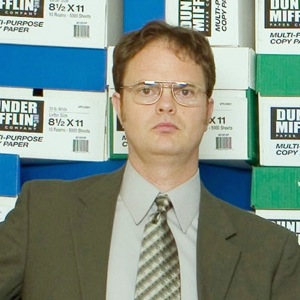

In [31]:
predictoffice("i own a farm and grow beats")

CALCULATING...
THIS TEXT IS COMPARABLE TO:
jim


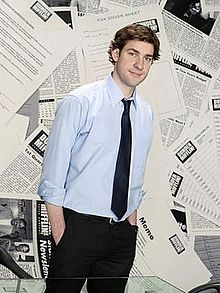

In [333]:
predictoffice("i love pam and watching sports")

CALCULATING...
THIS TEXT IS COMPARABLE TO:
andy


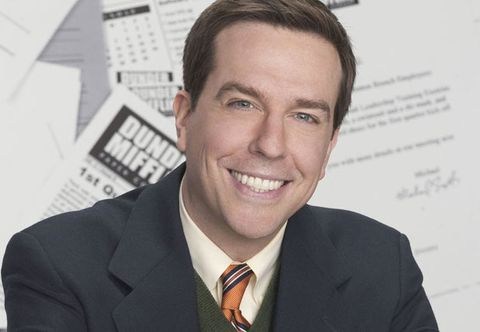

In [329]:
predictoffice("I went to cornell")

CALCULATING...
THIS TEXT IS COMPARABLE TO:
pam


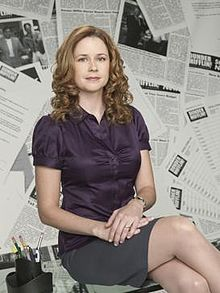

In [327]:
predictoffice('i love art and making paintings')

CALCULATING...
THIS TEXT IS COMPARABLE TO:
michael


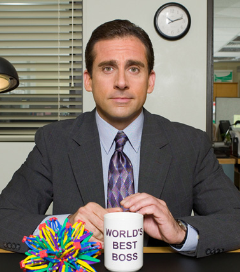

In [324]:
predictoffice("i am a manager second and a comedian first")